# 1. Load required libraries
# 2. Read data
# 3. Exploratory Data Analysis (EDA)
#    --> Missing Values
#    --> Relation between features
#        - Correlation between continuous variables
#        - Correlation between continuous feature and target variable
#    --> Find Outliers
#    --> Skew & Kurtosis
# 
# 4. Data Preprocessing
# 5. Data Visualization
# 6. Model Building and Evaluation
#    -- XGBoost
#    -- Random Forest Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# https://www.kaggle.com/code/fireballbyedimyrnmom/mt-cars

In [2]:
from sklearn.model_selection import train_test_split                                 # split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor                                   # this will make a Random Forest Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                 # this will do cross validation

In [3]:
df = pd.read_csv("mtcars.csv")

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df_orig = df.copy()

In [6]:
# 3. Exploratory Data Analysis (EDA)
#    --> Missing Values
#    --> Relation between features
#        - Correlation between continuous variables
#        - Correlation between continuous feature and target variable
#    --> Find Outliers
#    --> Skew & Kurtosis

In [7]:
df['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [8]:
df['carb'].value_counts()

4    10
2    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64

In [9]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [10]:
# Checking for missing value
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [12]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [13]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<AxesSubplot:>

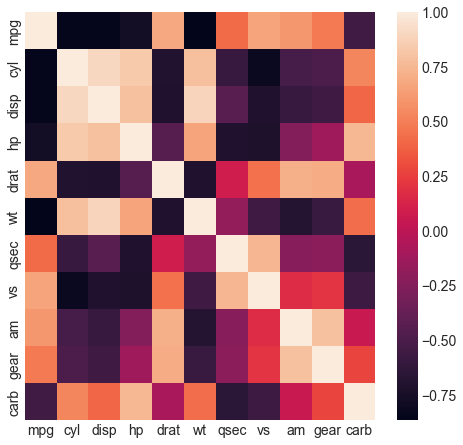

In [14]:
# Checking correlation by drawing heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

In [15]:
# 3.2 Check correlation between features
#     --> Correlation between continuous variables
#            a. Pearson Correlation
#            b. Spearman Correlation
#            c. kendall
#     --> Correlation between continuous feature and the target variable

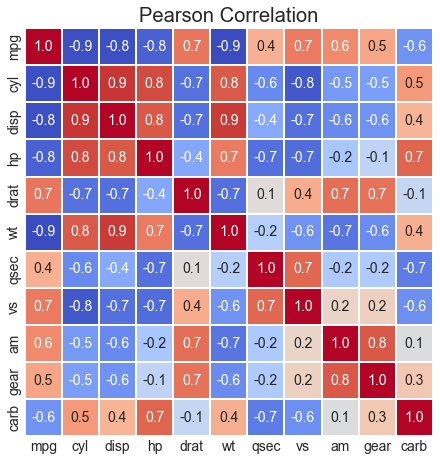

In [16]:
# a. Pearson correlation

plt.figure(figsize=(7,7))
plt.title("Pearson Correlation")
sns.heatmap(df.corr(method='pearson'),cbar=False, annot=True, fmt='.1f', linewidth=0.2, square=True, cmap='coolwarm')
# yha pearson method use hua hau
# cbar  --- mtlb side mai jo scale upar aaya hai wo nhi aaega
# annot --- mtlb box ke andar numerical values aaengi
# fmt   --- mtlb float values sirf ek decimal tk hongi
# linewidth --- box ke bich jo safed line hai uski width bta rha hai ye
# sqaure --- ????
plt.show()

<AxesSubplot:title={'center':'Spearman Correlation'}>

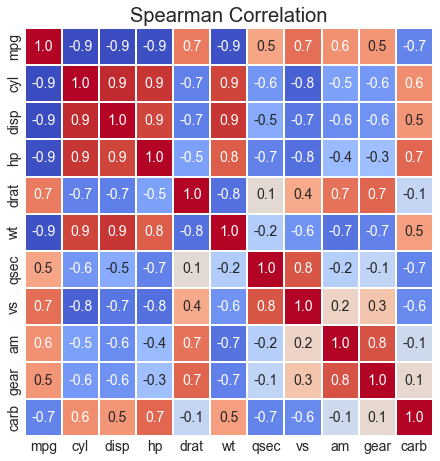

In [17]:
# b. Spearman Correlation

plt.figure(figsize= (7,7))
plt.title("Spearman Correlation")
sns.heatmap(df.corr(method='spearman'),cbar=False, annot=True, fmt='.1f', linewidth=0.1, square=True, cmap='coolwarm')

<AxesSubplot:title={'center':'Kendall Correlation'}>

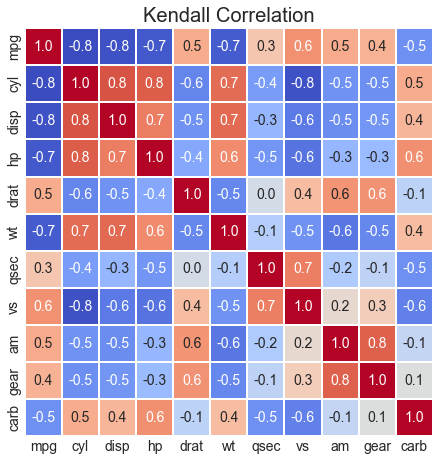

In [18]:
# c. kendall
plt.figure(figsize= (7,7))
plt.title("Kendall Correlation")
sns.heatmap(df.corr(method='kendall'),cbar=False, annot=True, fmt='.1f', linewidth=0.1, square=True, cmap='coolwarm')

In [19]:
# Correlation between continuous features and target variable
df.corr()['hp'].sort_values(ascending= False)

hp      1.000000
cyl     0.832447
disp    0.790949
carb    0.749812
wt      0.658748
gear   -0.125704
am     -0.243204
drat   -0.448759
qsec   -0.708223
vs     -0.723097
mpg    -0.776168
Name: hp, dtype: float64

<AxesSubplot:>

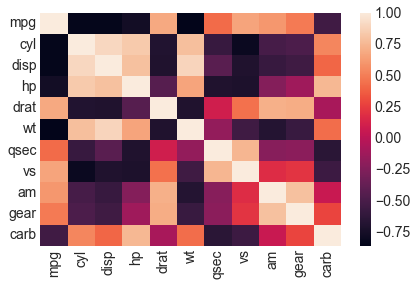

In [20]:
sns.heatmap(df.corr())

<AxesSubplot:>

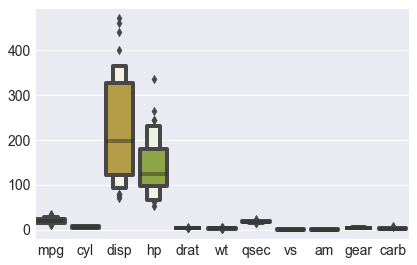

In [21]:
# Checking outlier in entire df -- 
# Outliers ----->  mpg, disp, hp, drat, wt, qsec, carb
sns.boxenplot(data= df)

<AxesSubplot:xlabel='cyl', ylabel='hp'>

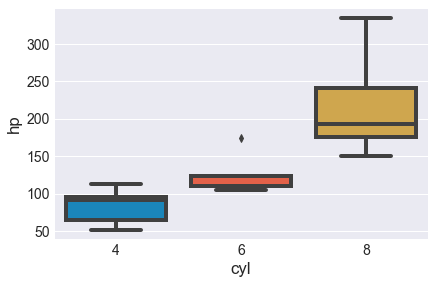

In [22]:
# hp mai bhi outlier hai

sns.boxplot('cyl','hp', data=df)

<AxesSubplot:xlabel='mpg'>

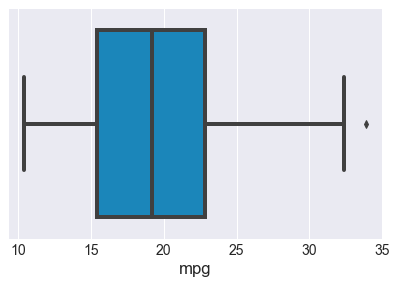

In [23]:
# mpg mai bhi outlier hai
sns.boxplot('mpg', data=df, hue= 'cyl')

<AxesSubplot:xlabel='vs', ylabel='wt'>

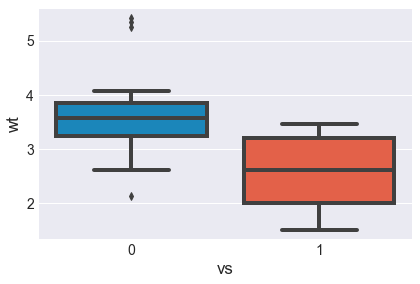

In [24]:
# wt mai bhi outlier hai

sns.boxplot('vs','wt', data=df)

<AxesSubplot:xlabel='disp'>

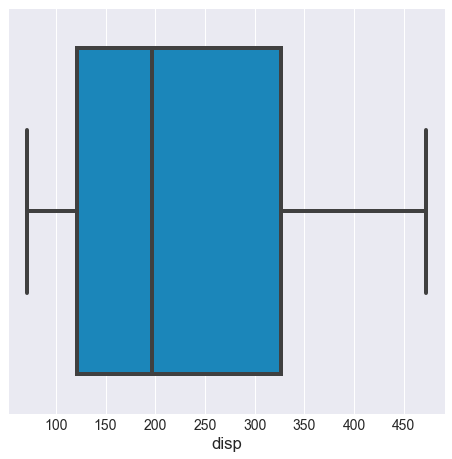

In [25]:
# displ mai bhi outlier hai
# but not showing ?????? why???
plt.figure(figsize= (7,7))
sns.boxplot('disp', data=df, hue='carb')

<AxesSubplot:xlabel='wt'>

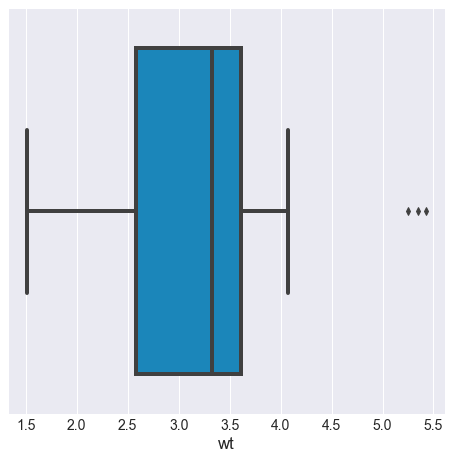

In [26]:
# Checking outliers in 'wt'
# w.r.t to cyl,vs,am,gear,carb--sb mai outlier aaega hi aaega

plt.figure(figsize= (7,7))
sns.boxplot('wt', data=df, hue= 'cyl')

<AxesSubplot:xlabel='carb'>

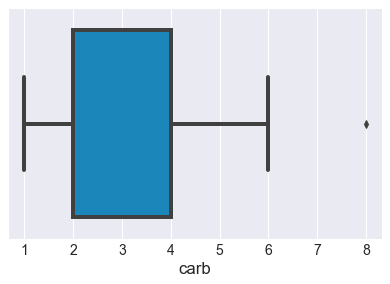

In [27]:
sns.boxplot('carb', data=df)

<AxesSubplot:xlabel='cyl', ylabel='hp'>

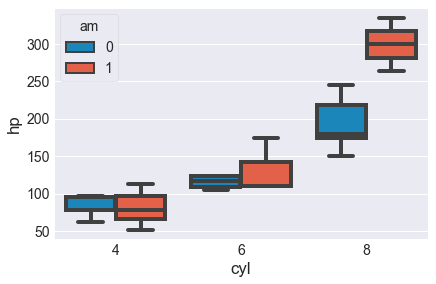

In [28]:
# multiple ke wajah se nhi dikha rha
sns.boxplot('cyl','hp', data=df, hue= 'am')


In [29]:
# 3.4 Skew and kurtosis
df.skew()

mpg     0.672377
cyl    -0.192261
disp    0.420233
hp      0.799407
drat    0.292780
wt      0.465916
qsec    0.406347
vs      0.264542
am      0.400809
gear    0.582309
carb    1.157091
dtype: float64

In [30]:
df.kurt()

mpg    -0.022006
cyl    -1.762794
disp   -1.067523
hp      0.275212
drat   -0.450432
wt      0.416595
qsec    0.864931
vs     -2.063273
am     -1.966550
gear   -0.895292
carb    2.020059
dtype: float64

# 5. Data Visualization

In [31]:
# 1. Univariate Analysis    - countplot, displot
# 2. Bivariate Analysis     - barplot, scatterplot, joinplot, violinplot
# 3. Multi-variate Analysis - pairplot

In [32]:
# 1. Univariate Analysis
#    (a) countplot
#    (b) displot


<AxesSubplot:xlabel='hp', ylabel='count'>

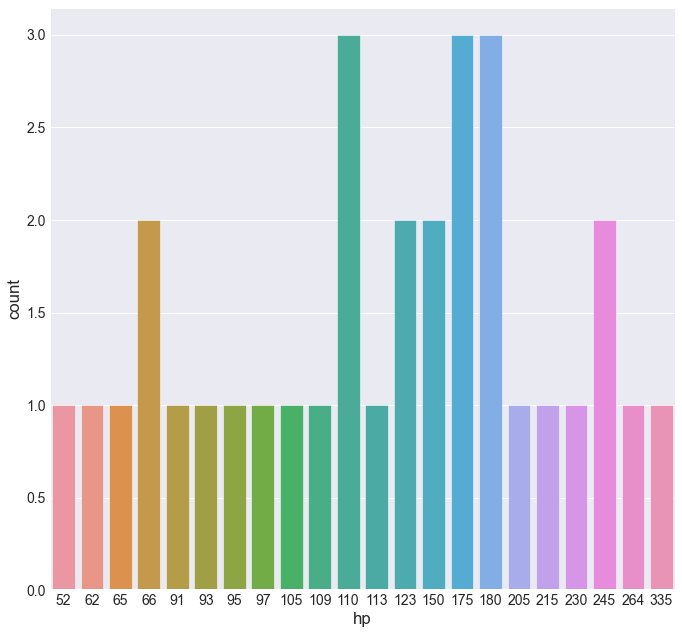

In [33]:
#    (a) countplot

plt.figure(figsize=(10,10))
sns.countplot('hp',data=df)

<AxesSubplot:xlabel='cyl', ylabel='count'>

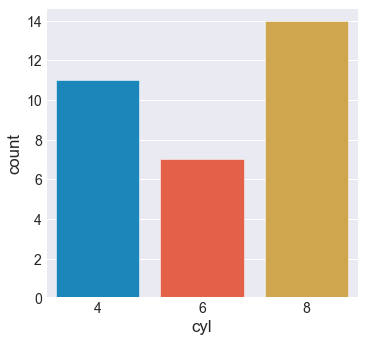

In [34]:
plt.figure(figsize=(5,5))
sns.countplot('cyl',data= df)

<AxesSubplot:xlabel='vs', ylabel='count'>

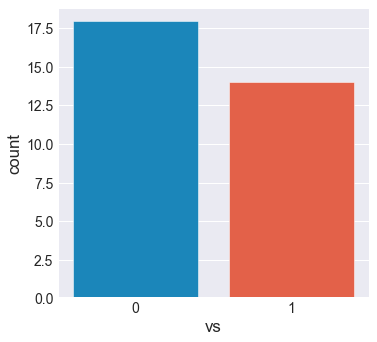

In [35]:
plt.figure(figsize=(5,5))
sns.countplot('vs',data= df)

<AxesSubplot:xlabel='am', ylabel='count'>

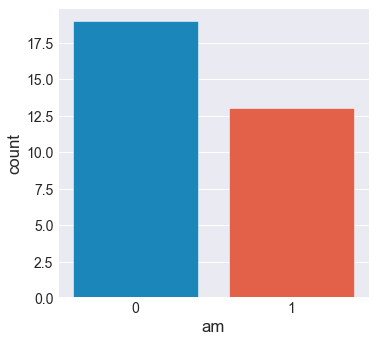

In [36]:
plt.figure(figsize=(5,5))
sns.countplot('am',data= df)

<AxesSubplot:xlabel='gear', ylabel='count'>

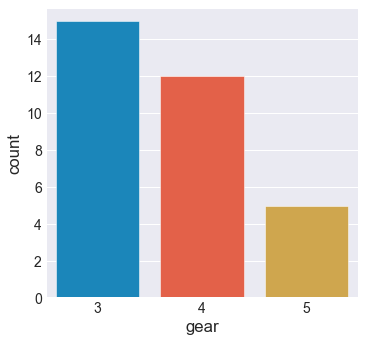

In [37]:
plt.figure(figsize=(5,5))
sns.countplot('gear',data= df)

<AxesSubplot:xlabel='carb', ylabel='count'>

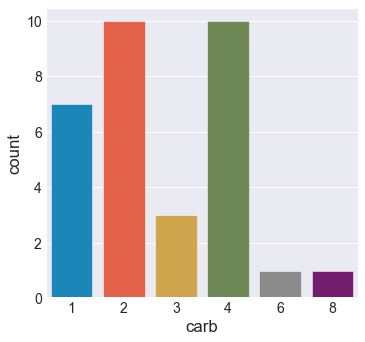

In [38]:
plt.figure(figsize=(5,5))
sns.countplot('carb',data= df)

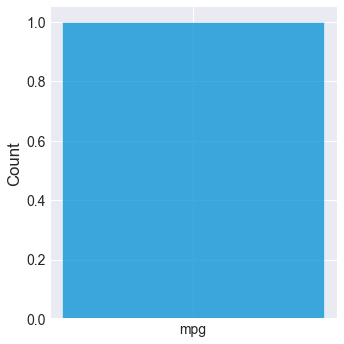

In [39]:
# plt.figure(figsize=(5,5))
sns.displot('mpg')

In [40]:
# 2. Bivariate Analysis     
#    (a) barplot 
#    (b) scatterplot
#    (c) joinplot 
#    (d) violinplot

#    (a) barplot 

<AxesSubplot:xlabel='cyl', ylabel='hp'>

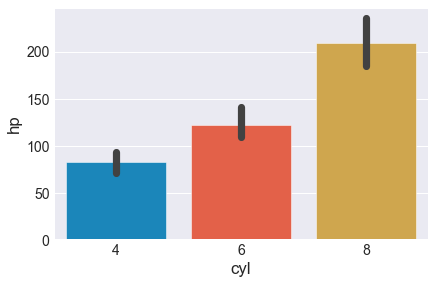

In [41]:
sns.barplot('cyl','hp',data=df)

<AxesSubplot:xlabel='vs', ylabel='hp'>

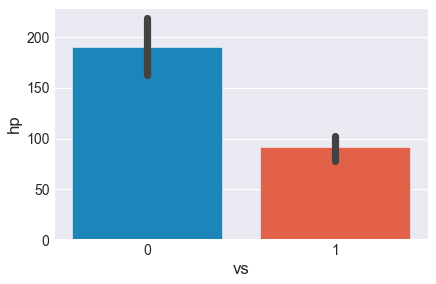

In [42]:
sns.barplot('vs','hp',data=df)

<AxesSubplot:xlabel='gear', ylabel='hp'>

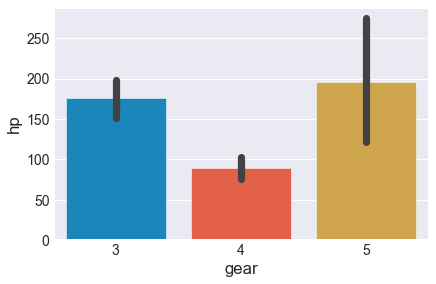

In [43]:
sns.barplot('gear','hp',data=df)

#    (b) scatterplot

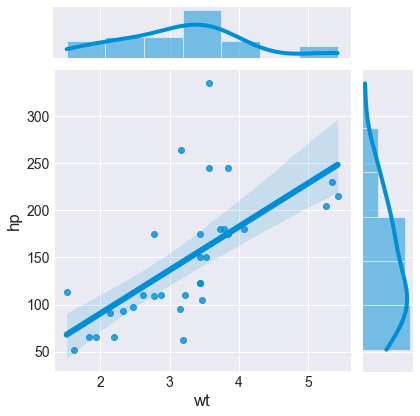

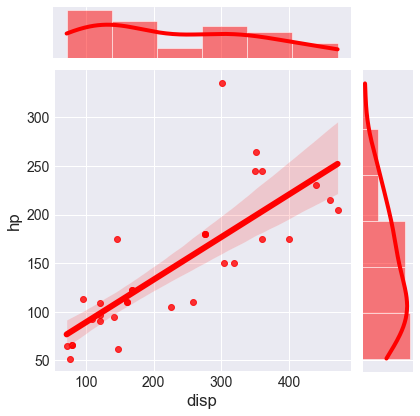

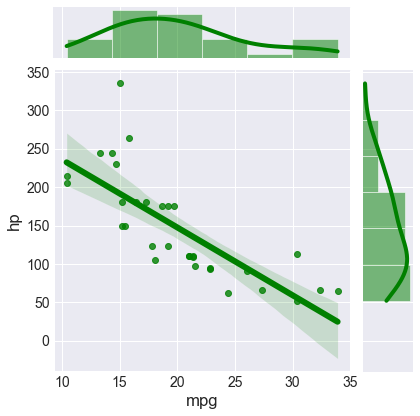

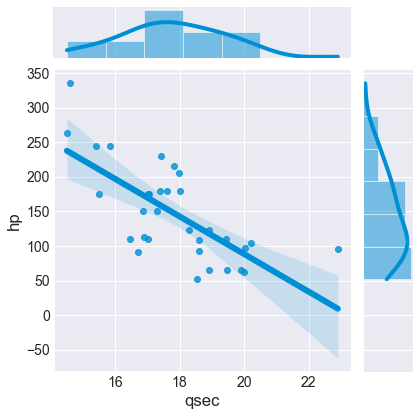

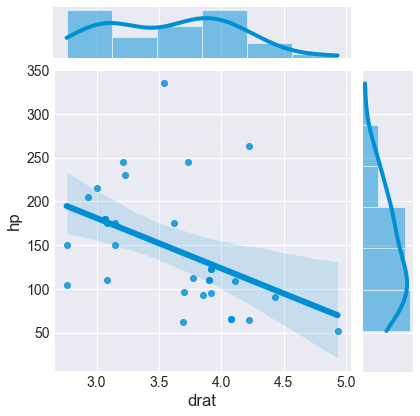

In [44]:
# Scatter plot of hp w.r.t others
sns.jointplot('wt','hp',data=df,kind='reg')
sns.jointplot('disp','hp',data=df,kind='reg', color= 'red')
sns.jointplot('mpg','hp',data=df,kind='reg', color= 'green')
sns.jointplot('qsec','hp',data=df,kind='reg')
sns.jointplot('drat','hp',data=df,kind='reg')

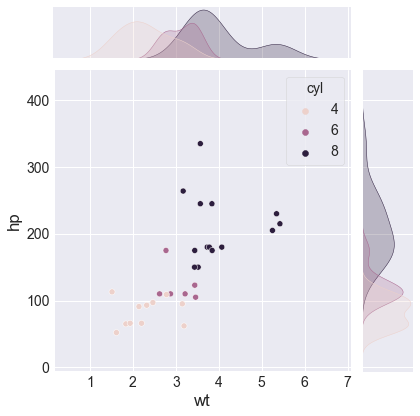

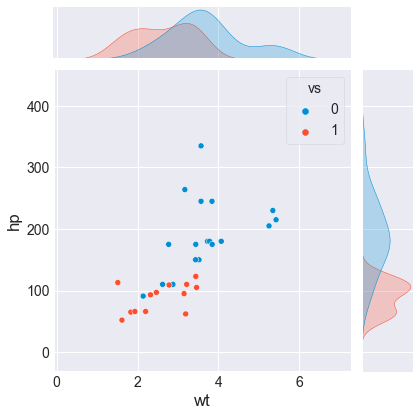

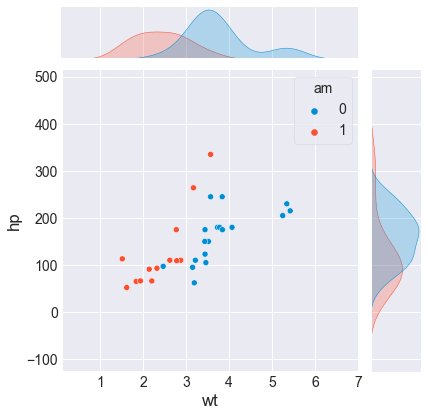

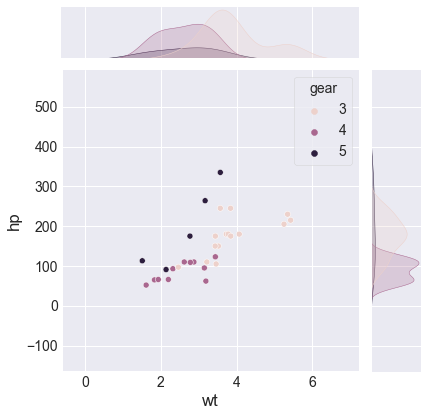

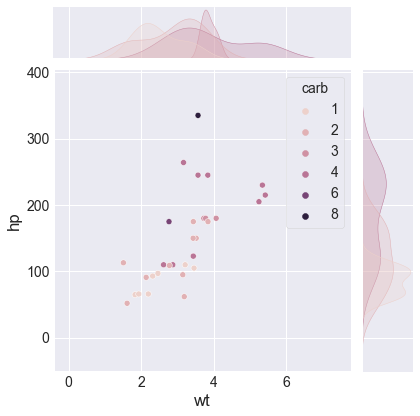

In [45]:
# Scatter plot of 'hp' vs 'wt'
sns.jointplot('wt','hp',data=df,hue='cyl')
sns.jointplot('wt','hp',data=df,hue='vs')
sns.jointplot('wt','hp',data=df,hue='am')
sns.jointplot('wt','hp',data=df,hue='gear')
sns.jointplot('wt','hp',data=df,hue='carb')

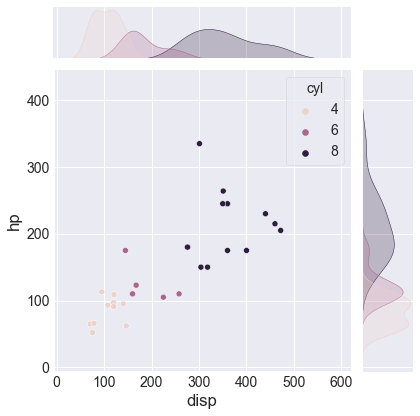

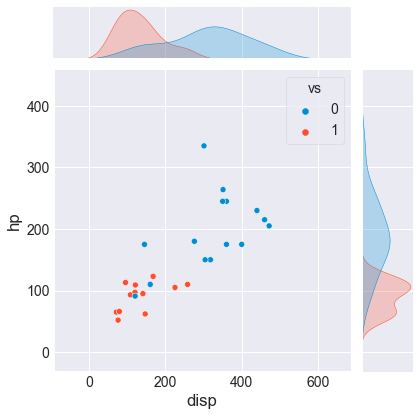

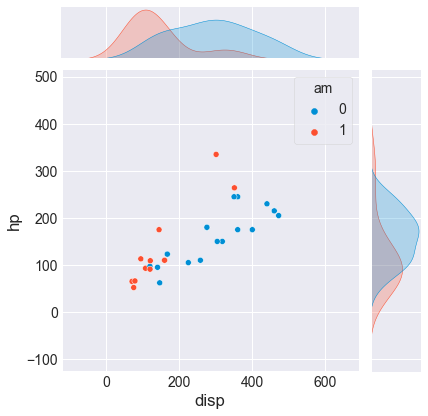

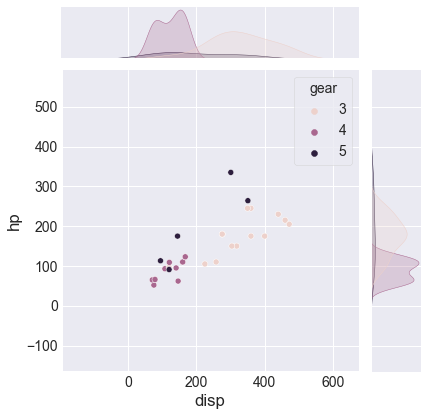

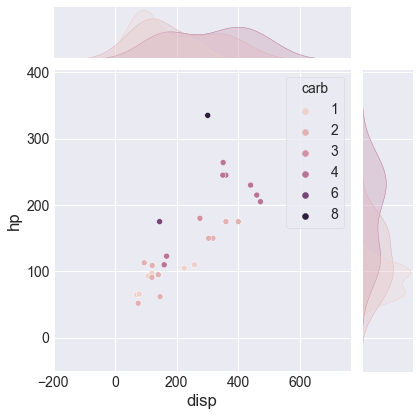

In [46]:
# Scatter plot of 'hp' vs 'disp'
sns.jointplot('disp','hp',data=df,hue='cyl')
sns.jointplot('disp','hp',data=df,hue='vs')
sns.jointplot('disp','hp',data=df,hue='am')
sns.jointplot('disp','hp',data=df,hue='gear')
sns.jointplot('disp','hp',data=df,hue='carb')

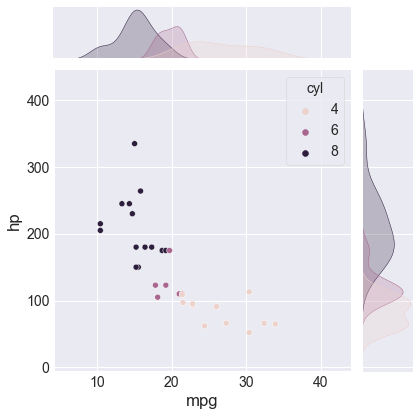

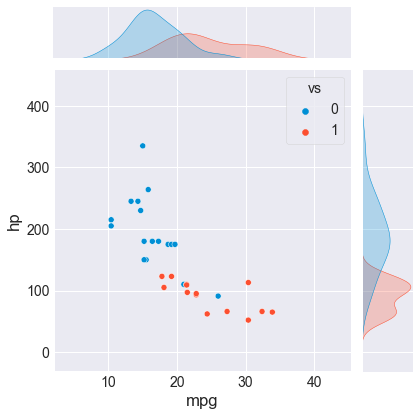

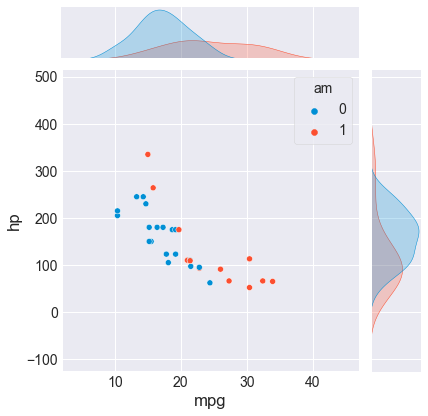

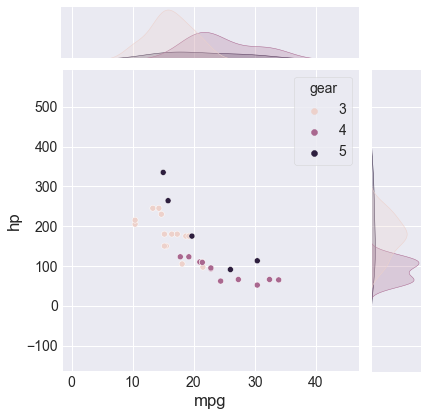

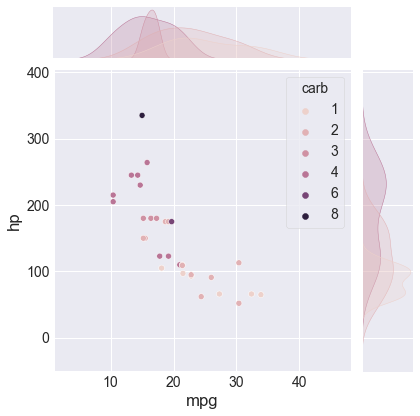

In [47]:
# Scatter plot of 'hp' vs 'mpg'
sns.jointplot('mpg','hp',data=df,hue='cyl')
sns.jointplot('mpg','hp',data=df,hue='vs')
sns.jointplot('mpg','hp',data=df,hue='am')
sns.jointplot('mpg','hp',data=df,hue='gear')
sns.jointplot('mpg','hp',data=df,hue='carb')

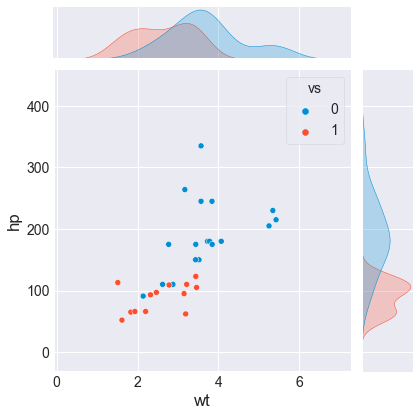

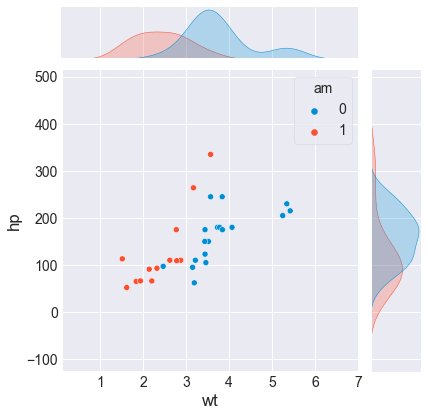

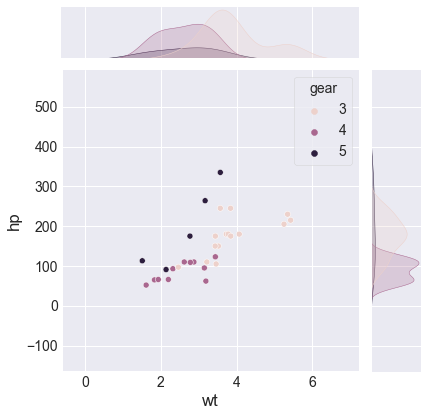

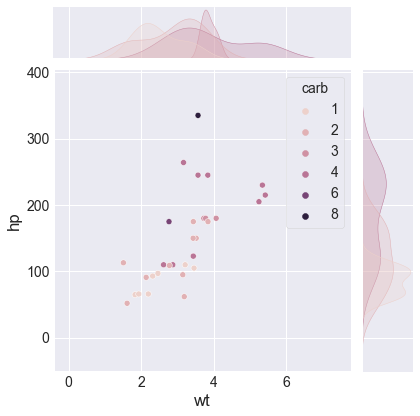

In [48]:
sns.jointplot('wt','hp',data=df,hue='vs')
sns.jointplot('wt','hp',data=df,hue='am')
sns.jointplot('wt','hp',data=df,hue='gear')
sns.jointplot('wt','hp',data=df,hue='carb')

#    Multi-variate Analysis
#    --> pairplot

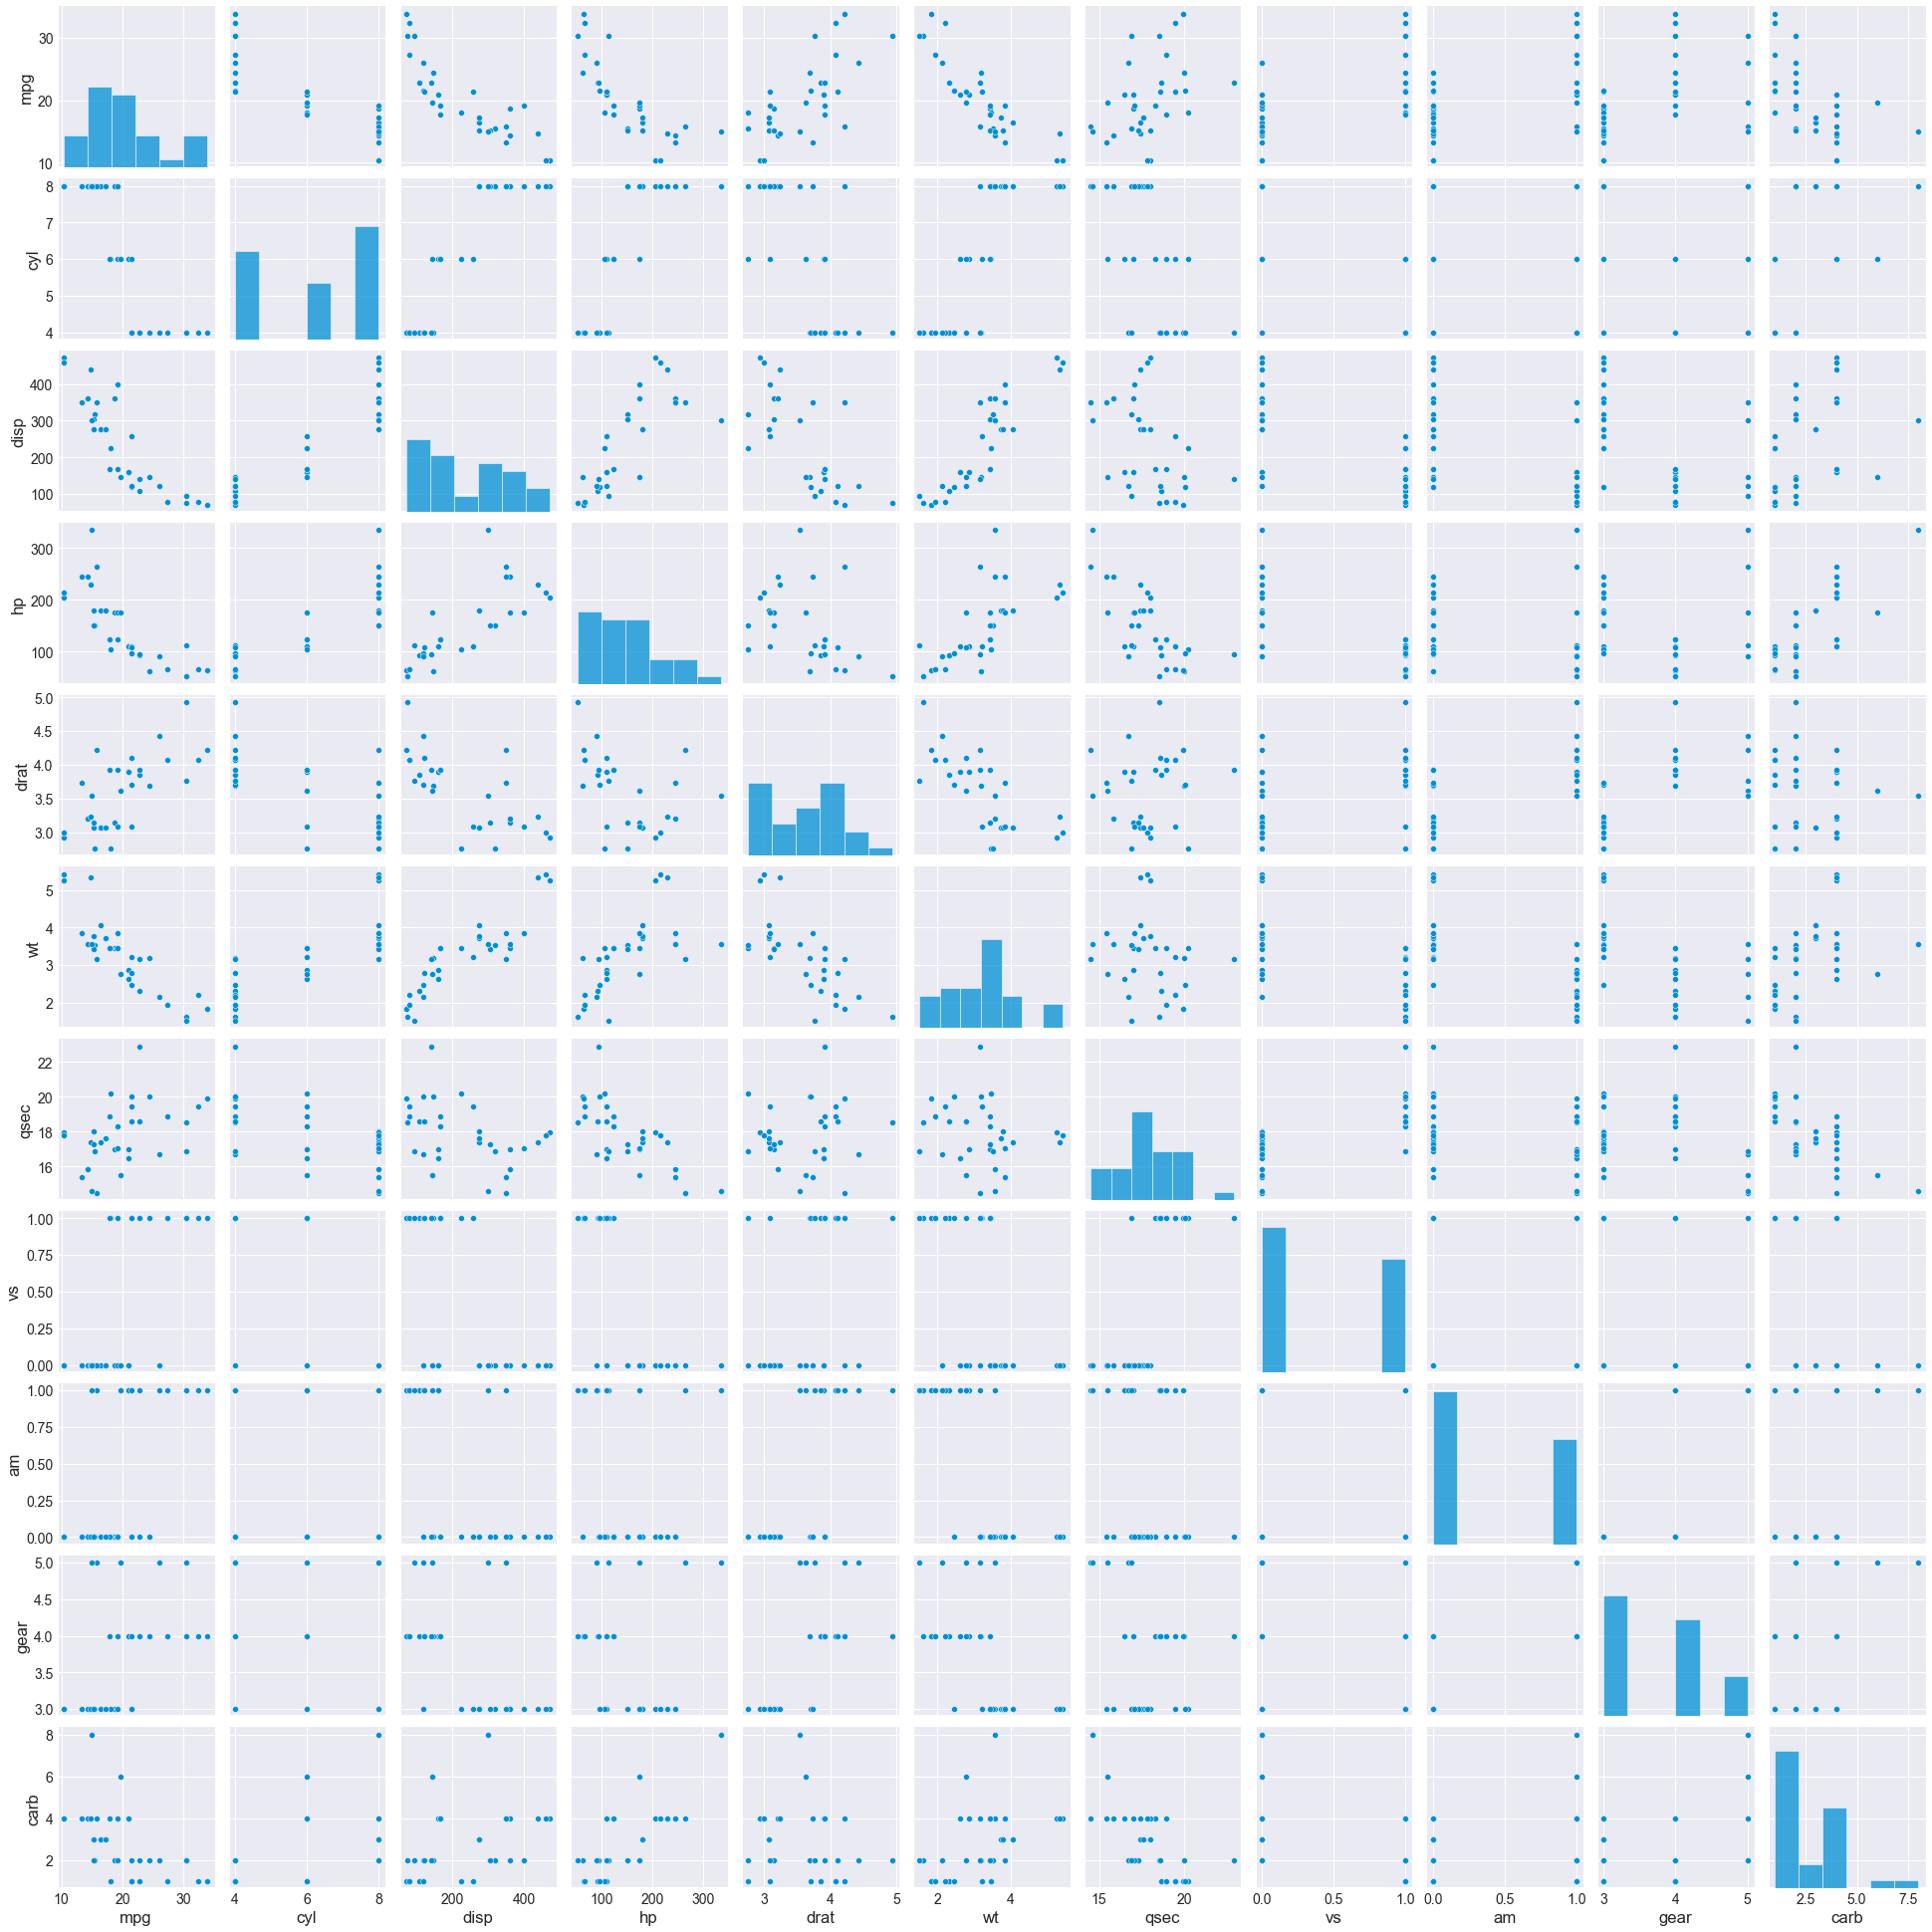

In [49]:
sns.pairplot(df)

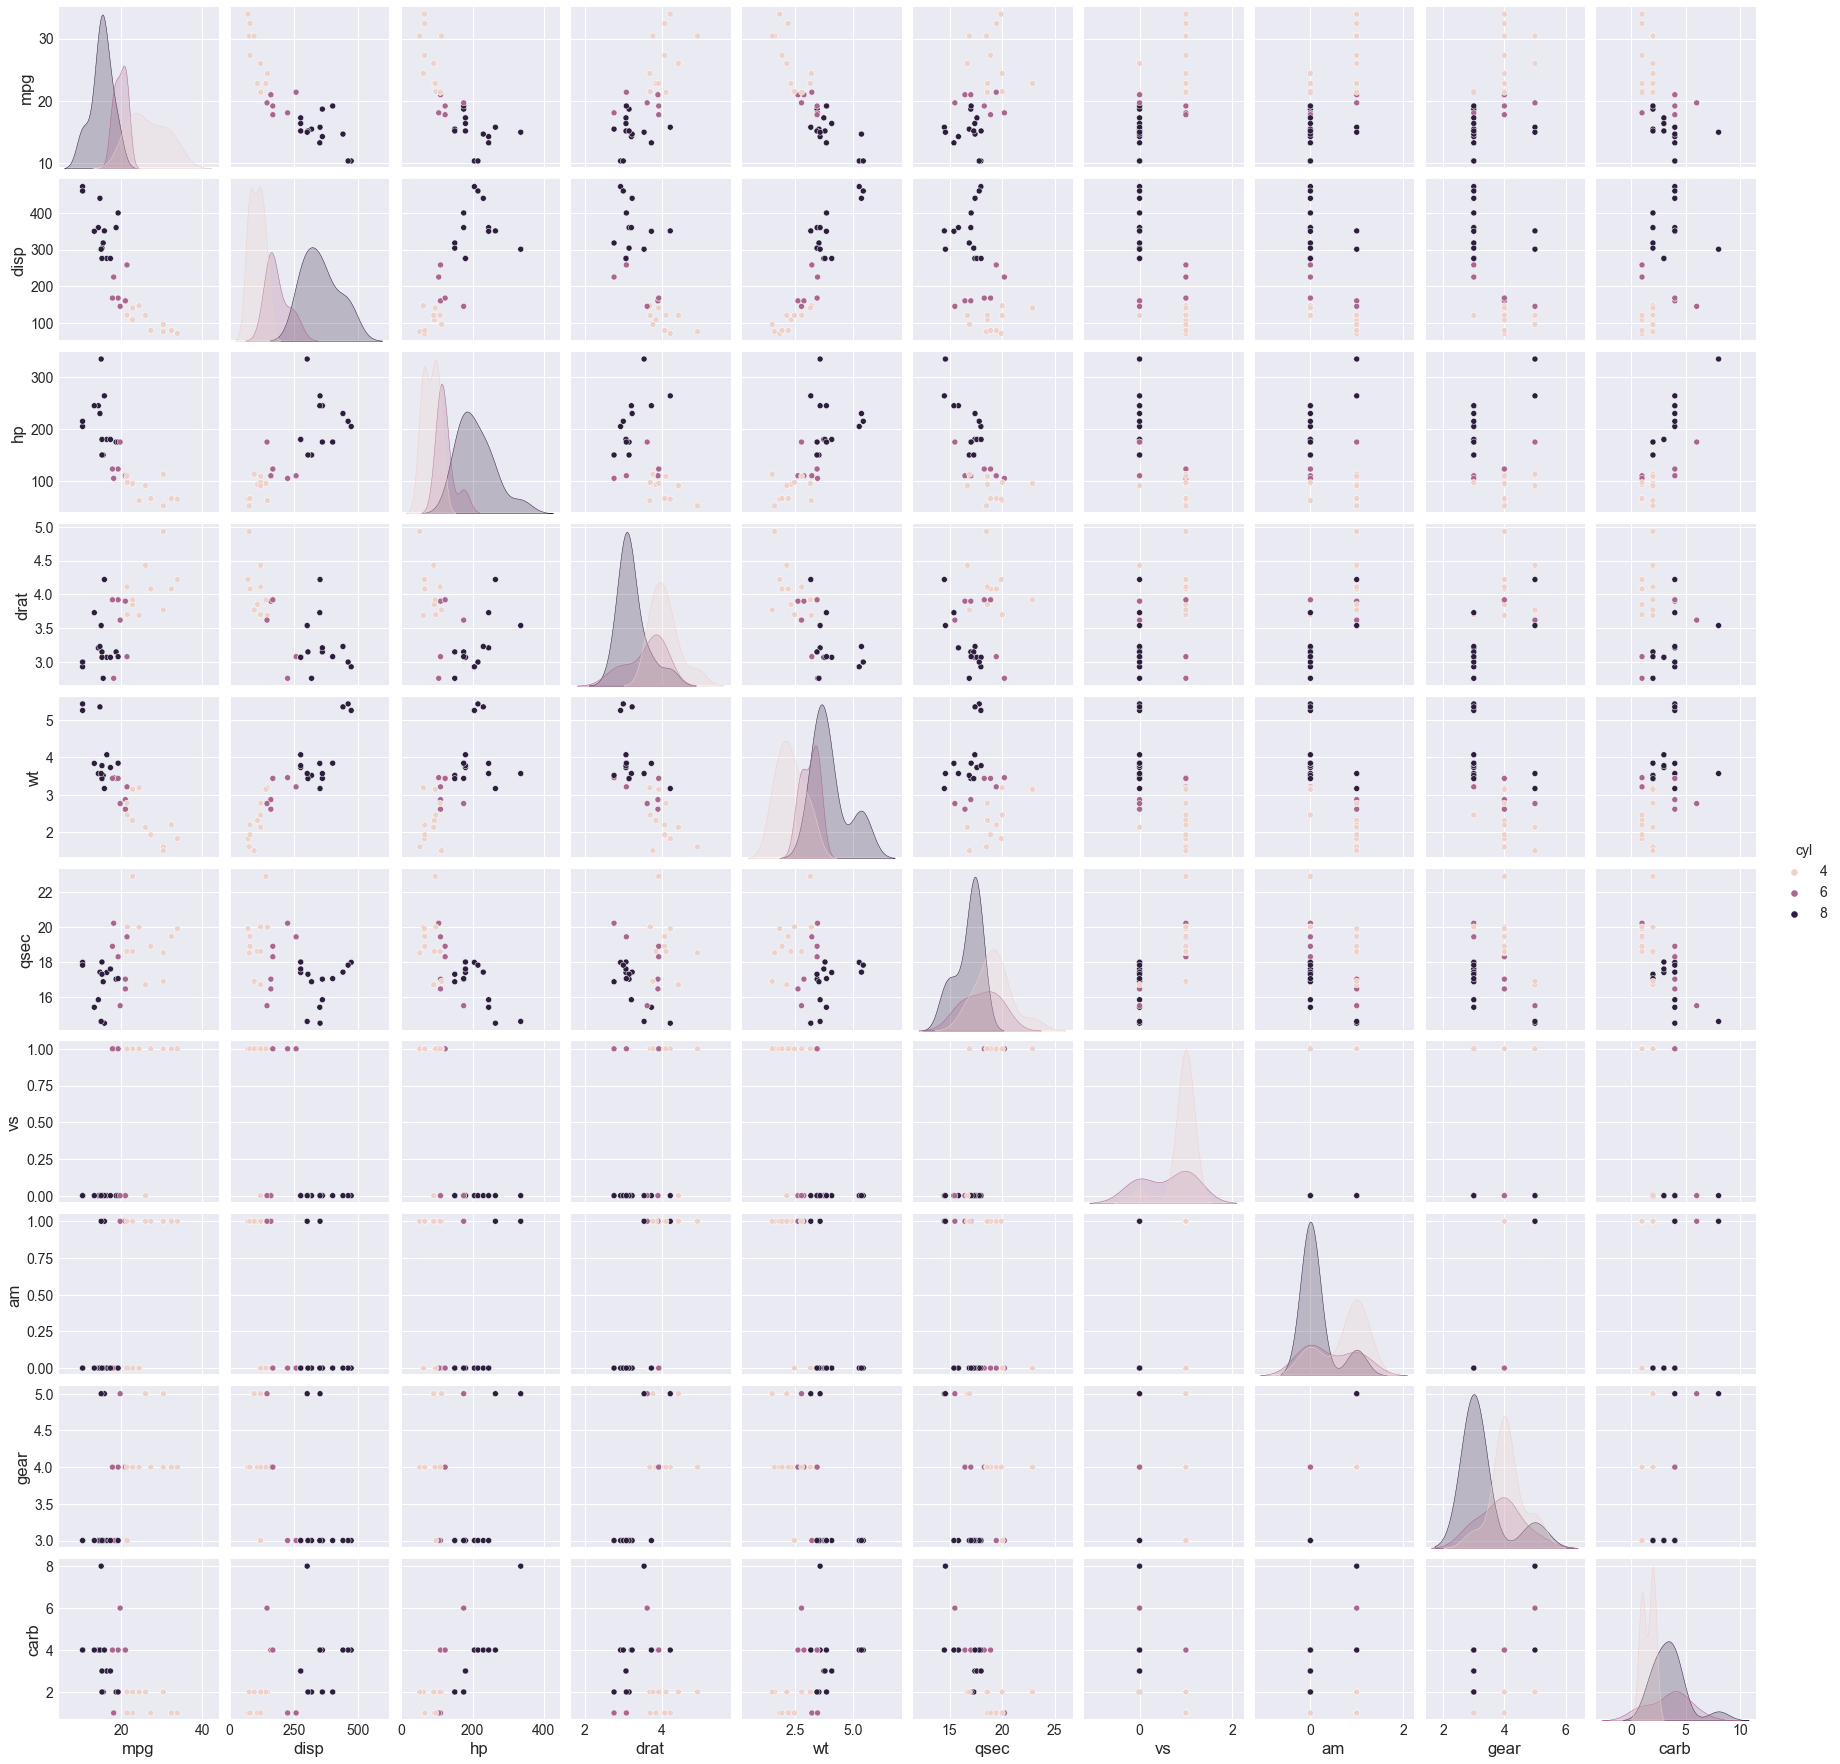

In [50]:
sns.pairplot(df, hue= 'cyl')

# 6. Model Building 
XGBRegressor,
LGBMRegressor,
RandomForestRegressor,
KNeighborsRegressor

In [158]:
# Import the models
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = df.drop(['hp','model'], axis = 1)

In [141]:
X.head()

,mpg,cyl,disp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,3.15,3.440,17.02,0,0,3,2


In [142]:
Y = df['hp']

In [143]:
Y.head()

0    110
1    110
2     93
3    110
4    175
Name: hp, dtype: int64

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3)

In [159]:
# Fitting dataset in 1st model - XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [160]:
y_pred_xgb = xgb.predict(X_test)


In [161]:
# print(y_pred, Y_test)
'Predicted',y_pred_xgb, 'Actual',Y_test

('Predicted',
 array([ 66.58358 , 172.23428 , 112.4004  ,  67.4213  ,  90.75507 ,
        112.193184, 205.72995 , 210.99234 , 110.14066 ,  91.7812  ],
       dtype=float32),
 'Actual',
 18     52
 22    150
 20     97
 27    113
 8      95
 31    109
 16    230
 6     245
 1     110
 7      62
 Name: hp, dtype: int64)

In [162]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics
print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_xgb))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_xgb))
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train,Y_train),xgb.score(X_test,Y_test)))

Mean Squared Error:: 568.2345614566409
Mean Absolute Error:: 19.343463897705078
Train Score 1.00 & Test Score 0.85


In [169]:
# Fitting dataset in 2nd model - LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train,Y_train)

LGBMRegressor()

In [170]:
y_pred_lgbm = lgbm.predict(X_test)

In [171]:
y_pred_lgbm, Y_train

(array([155.95454545, 155.95454545, 155.95454545, 155.95454545,
        155.95454545, 155.95454545, 155.95454545, 155.95454545,
        155.95454545, 155.95454545]),
 0     110
 19     65
 29    175
 15    215
 2      93
 10    123
 11    180
 21    150
 14    205
 12    180
 24    175
 4     175
 28    264
 17     66
 3     110
 13    180
 30    335
 23    245
 5     105
 26     91
 9     123
 25     66
 Name: hp, dtype: int64)

In [172]:
from pyexpat import model


print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_lgbm))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_lgbm))
print("Train Score {:.2f} & Test Score {:.2f}".format(lgbm.score(X_train,Y_train),lgbm.score(X_test,Y_test)))

Mean Squared Error:: 4643.402066115703
Mean Absolute Error:: 62.27272727272729
Train Score 0.00 & Test Score -0.23


In [173]:
# Fitting dataset in 3rd model - RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [174]:
y_pred_rfr = rfr.predict(X_test)

In [175]:
y_pred_rfr, Y_test

(array([ 70.75, 179.3 , 106.22,  90.36, 108.33, 100.92, 200.3 , 201.07,
        123.65, 110.41]),
 18     52
 22    150
 20     97
 27    113
 8      95
 31    109
 16    230
 6     245
 1     110
 7      62
 Name: hp, dtype: int64)

In [176]:
# Fitting dataset in 4th model - KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [177]:
y_pred_knr = knr.predict(X_test)

In [178]:
y_pred_knr, Y_test

(array([ 76.2, 205. , 107. ,  76.2, 124.4, 107. , 206.8, 201.8, 124.4,
        124.4]),
 18     52
 22    150
 20     97
 27    113
 8      95
 31    109
 16    230
 6     245
 1     110
 7      62
 Name: hp, dtype: int64)

In [179]:
print("XGBRegressor::")
print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_xgb))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_xgb))
print("Train Score {:.2f} & Test Score {:.2f}\n".format(xgb.score(X_train,Y_train),xgb.score(X_test,Y_test)))

print("LGBMRegressor_model::")
print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_lgbm))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_lgbm))
print("Train Score {:.2f} & Test Score {:.2f}\n".format(lgbm.score(X_train,Y_train),lgbm.score(X_test,Y_test)))

print("RandomForestRegressor::")
print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_rfr))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_rfr))
print("Train Score {:.2f} & Test Score {:.2f}\n".format(rfr.score(X_train,Y_train),rfr.score(X_test,Y_test)))


print("KNeighborsRegressor::")
print("Mean Squared Error::",mean_squared_error(Y_test,y_pred_knr))
print("Mean Absolute Error::",mean_absolute_error(Y_test,y_pred_knr))
print("Train Score {:.2f} & Test Score {:.2f}".format(knr.score(X_train,Y_train),knr.score(X_test,Y_test)))

XGBRegressor::
Mean Squared Error:: 568.2345614566409
Mean Absolute Error:: 19.343463897705078
Train Score 1.00 & Test Score 0.85

LGBMRegressor_model::
Mean Squared Error:: 4643.402066115703
Mean Absolute Error:: 62.27272727272729
Train Score 0.00 & Test Score -0.23

RandomForestRegressor::
Mean Squared Error:: 739.23913
Mean Absolute Error:: 23.701
Train Score 0.97 & Test Score 0.80

KNeighborsRegressor::
Mean Squared Error:: 1243.884
Mean Absolute Error:: 30.060000000000002
Train Score 0.62 & Test Score 0.67
